# Data Ingestion

In [1]:

import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:

dc_listings=pd.read_csv("/Users/shashankkumar/Studies/Self/DataScience/Projects/Dataset/AirBnB-Dataset/listings.csv")
dc_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,4873463,https://www.airbnb.com/rooms/4873463,20170510175449,2017-05-11,"Cozy Pied-a-Terre, the Heart of DC",Experience micro-living at its cutest and most...,***STARTING 4/1/17 I WILL BE FIELDING LONG-TER...,Experience micro-living at its cutest and most...,none,This is a scenic and quiet historic residentia...,...,9.0,f,NaN,"DISTRICT OF COLUMBIA, WASHINGTON",f,flexible,f,f,3,1.01
1,16736650,https://www.airbnb.com/rooms/16736650,20170510175449,2017-05-11,"Large, welcoming studio in a central location",The location of this studio is unbeatable! Cen...,NaN,The location of this studio is unbeatable! Cen...,none,"Dupont Circle is a traffic circle, park, neigh...",...,10.0,f,NaN,"DISTRICT OF COLUMBIA, WASHINGTON",f,flexible,f,f,1,0.55
2,14999877,https://www.airbnb.com/rooms/14999877,20170510175449,2017-05-11,Newly Renovated Apartment in the Heart of DC,This newly renovated apartment is fully equipp...,NaN,This newly renovated apartment is fully equipp...,none,NaN,...,NaN,f,NaN,"DISTRICT OF COLUMBIA, WASHINGTON",t,moderate,f,f,1,NaN
3,5955860,https://www.airbnb.com/rooms/5955860,20170510175449,2017-05-11,Spacious Dupont Circle Condo,Have an entire condo to yourself! 1 Bedroom an...,"Includes one bedroom with a full size bed, one...",Have an entire condo to yourself! 1 Bedroom an...,none,Historic Dupont Circle Neighborhood - Dupont ...,...,9.0,f,NaN,"DISTRICT OF COLUMBIA, WASHINGTON",f,flexible,f,f,2,3.13
4,15655208,https://www.airbnb.com/rooms/15655208,20170510175449,2017-05-11,Luxury historic rowhouse; Adams Morgan/Dupont/...,"You’ll love my place because of the location, ...","The kitchen is a chef's dream, and the dining ...","You’ll love my place because of the location, ...",none,We are centrally located at the bottom of funk...,...,10.0,f,NaN,"DISTRICT OF COLUMBIA, WASHINGTON",f,strict,f,f,1,1.00


# Data Exploration

In [3]:
dc_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [4]:
dc_listings.describe()

,id,scrape_id,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,7.788000e+03,7.788000e+03,7.788000e+03,0.0,7786.000000,7786.000000,0.0,7788.000000,7788.000000,7788.000000,...,5581.000000,5568.000000,5570.000000,5563.000000,5568.000000,5563.000000,5561.000000,0.0,7788.000000,5660.000000
mean,1.150840e+07,2.017051e+13,3.498247e+07,NaN,20.867198,20.867198,NaN,38.912571,-77.020264,3.584361,...,94.724064,9.672055,9.502334,9.816106,9.801545,9.562646,9.507283,NaN,4.653313,2.003346
std,5.555763e+06,3.386936e+00,3.451405e+07,NaN,109.703557,109.703557,NaN,0.022134,0.028788,2.211948,...,7.349311,0.761850,0.936910,0.572798,0.616186,0.782416,0.812222,NaN,12.425858,2.101716
min,2.476000e+03,2.017051e+13,2.723000e+03,NaN,0.000000,0.000000,NaN,38.823403,-77.119503,1.000000,...,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.010000
25%,7.001839e+06,2.017051e+13,7.042365e+06,NaN,1.000000,1.000000,NaN,38.899684,-77.038359,2.000000,...,93.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.390000
50%,1.339032e+07,2.017051e+13,2.265551e+07,NaN,1.000000,1.000000,NaN,38.911967,-77.022989,3.000000,...,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.190000
75%,1.640420e+07,2.017051e+13,5.118096e+07,NaN,2.000000,2.000000,NaN,38.924955,-76.999927,4.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.867079e+07,2.017051e+13,1.297105e+08,NaN,879.000000,879.000000,NaN,38.994689,-76.913137,16.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,79.000000,21.350000


In [5]:
dc_listings.shape

(7788, 95)

In [6]:
dc_listings.isnull().any()

id                                  False
listing_url                         False
scrape_id                           False
last_scraped                        False
name                                 True
summary                              True
space                                True
description                          True
experiences_offered                 False
neighborhood_overview                True
notes                                True
transit                              True
access                               True
interaction                          True
house_rules                          True
thumbnail_url                        True
medium_url                           True
picture_url                         False
xl_picture_url                       True
host_id                             False
host_url                            False
host_name                            True
host_since                           True
host_location                     

In [7]:

pandas_profiling.ProfileReport(dc_listings)

Number of variables,95
Number of observations,7788
Total Missing (%),16.0%
Total size in memory,5.6 MiB
Average record size in memory,760.0 B
Numeric,25
Categorical,57
Boolean,0
Date,0
Text (Unique),1
Rejected,12


# Data Cleaning

As is clear from the above stats, we need to reduce the feature space. Reasons to reject features:

- Highly correlated features(availability_60,availability_90, host_total_listings_count)
- No predictive power because of same value throughout the dataframe-(country, country_code, experiences_offered , has_availability, host_acceptance_rate, license , neighbourhood_group_cleansed, requires_license, scrape_id)
- No predictive power- 'id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'calendar_updated', 'has_availability',
       'number_of_reviews',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'requires_license',
       'license', 'jurisdiction_names', 'instant_bookable',
       'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       
       
       
Here are the columns we are going to use for predictions for the time being:

- host_response_rate: the response rate of the host
- host_acceptance_rate: number of requests to the host that convert to rentals
- host_listings_count: number of other listings the host has
- latitude: latitude dimension of the geographic coordinates
- longitude: longitude part of the coordinates
- city: the city the living space resides
- zipcode: the zip code the living space resides
- state: the state the living space resides
- accommodates: the number of guests the rental can accommodate
- room_type: the type of living space (Private room, Shared room or Entire home/apt
- bedrooms: number of bedrooms included in the rental
- bathrooms: number of bathrooms included in the rental
- beds: number of beds included in the rental
- price: nightly price for the rental
- cleaning_fee: additional fee used for cleaning the living space after the guest leaves
- security_deposit: refundable security deposit, in case of damages
- minimum_nights: minimum number of nights a guest can stay for the rental
- maximum_nights: maximum number of nights a guest can stay for the rental
- number_of_reviews: number of reviews that previous guests have left
- cancellation_policy

In [8]:
features_to_keep=['host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'latitude', 'longitude', 'city', 'zipcode', 'state', 'accommodates', 'room_type', 'bedrooms', 'bathrooms', 'beds', 'price', 'cleaning_fee', 'security_deposit', 'minimum_nights','maximum_nights', 'number_of_reviews']
dc_listings=dc_listings[features_to_keep]
pandas_profiling.ProfileReport(dc_listings)

Number of variables,19
Number of observations,7788
Total Missing (%),12.0%
Total size in memory,1.1 MiB
Average record size in memory,152.0 B
Numeric,10
Categorical,8
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [9]:
dc_listings.shape

(7788, 19)

## Formatting price column



Right now, the price column contains comma characters (,) and dollar sign characters and is formatted as a text column instead of a numeric one. We need to remove these values and convert the entire column to the float datatype.

In [10]:
stripped_commas=dc_listings['price'].str.replace(',','')
stripped_dollar=stripped_commas.str.replace('$','')
dc_listings['price']=stripped_dollar.astype('float')

The following columns contain non-numerical values:

- room_type: e.g. Private room
- city: e.g. Washington
- state: e.g. DC
while following columns are numerical but non-ordinal values:

- latitude: e.g. 38.913458
- longitude: e.g. -77.031
- zipcode: e.g. 20009

Geographic values like these aren't ordinal, because a smaller numerical value doesn't directly correspond to a smaller value in a meaningful way. For example, the zip code 75023 isn't smaller or larger than the zip code 20009 and instead both are unique, identifier values. Latitude and longitude value pairs describe a point on a geographic coordinate system and different equations are used in those cases.

While we could convert the host_response_rate and host_acceptance_rate columns to be numerical (right now they're object data types and contain the % sign), these columns describe the host and not the living space itself. Since a host could have many living spaces and we don't have enough information to uniquely group living spaces to the hosts themselves, let's avoid using any columns that don't directly describe the living space or the listing itself:

- host_response_rate
- host_acceptance_rate
- host_listings_count

We will remove these 9 columns from the Dataframe.

In [11]:
dc_listings.drop(['room_type', 'city', 'state','latitude','longitude','zipcode','host_response_rate','host_acceptance_rate','host_listings_count'],axis=1, inplace=True)
print(dc_listings.columns)

Index(['accommodates', 'bedrooms', 'bathrooms', 'beds', 'price',
       'cleaning_fee', 'security_deposit', 'minimum_nights', 'maximum_nights',
       'number_of_reviews'],
      dtype='object')


Of the remaining columns, 3 columns have a few missing values (less than 1% of the total number of rows):

- bedrooms
- bathrooms
- beds

Since the number of rows containing missing values for one of these 3 columns is low, we can select and remove those rows without losing much information. There are also 2 columns have a large number of missing values:

- cleaning_fee - 37.3% of the rows
- security_deposit - 61.7% of the rows

For the time being, let's remove these two columns as well.


In [12]:
dc_listings.drop(['cleaning_fee','security_deposit'],axis=1,inplace=True)
dc_listings.dropna(axis=0, inplace=True)
dc_listings.isnull().any()


accommodates         False
bedrooms             False
bathrooms            False
beds                 False
price                False
minimum_nights       False
maximum_nights       False
number_of_reviews    False
dtype: bool

In [13]:
dc_listings.head()

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
0,3,0.0,1.0,1.0,95.0,2,1125,29
1,2,0.0,1.0,1.0,200.0,1,5,2
2,2,1.0,1.0,2.0,100.0,27,31,0
3,3,1.0,1.0,2.0,129.0,2,1125,79
4,4,2.0,2.5,4.0,500.0,2,9,1


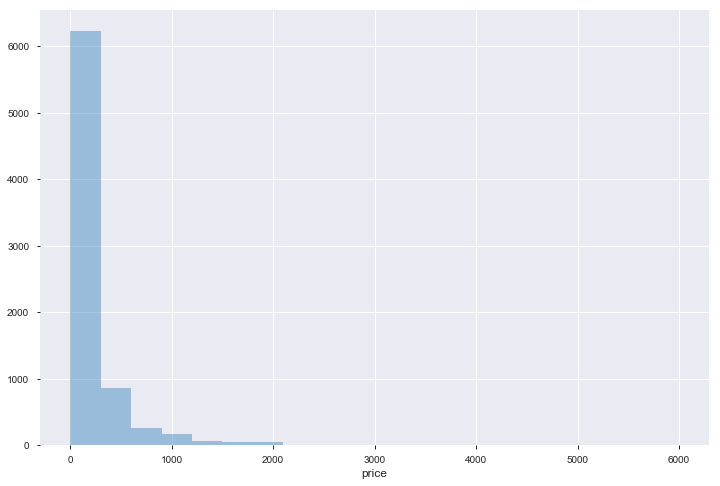

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(12,8))
sns.distplot(dc_listings.price.values, bins=20, kde=False)
plt.xlabel('price', fontsize=12)
plt.show()



In [15]:
dc_listings.columns

Index(['accommodates', 'bedrooms', 'bathrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'number_of_reviews'],
      dtype='object')

In [16]:
dc_listings.shape

(7753, 8)

# Data Normalization

The values in the maximum_nights and number_of_reviews columns span much larger ranges. For instance, the maximum_nights column has values as low as 4 and high as 1125, in the first few rows itself. 

Normalizing the values in each columns to the standard normal distribution (mean of 0, standard deviation of 1) preserves the distribution of the values in each column while aligning the scales. 

In [17]:
normalized_listings=(dc_listings-dc_listings.mean())/dc_listings.std()
normalized_listings['price']=dc_listings['price']
normalized_listings.head()

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
0,-0.266298,-1.447867,-0.491711,-0.657934,95.0,-0.112754,-0.013925,0.255260
1,-0.717973,-1.447867,-0.491711,-0.657934,200.0,-0.243914,-0.013970,-0.468953
2,-0.717973,-0.376238,-0.491711,0.132545,100.0,3.166250,-0.013969,-0.522598
3,-0.266298,-0.376238,-0.491711,0.132545,129.0,-0.112754,-0.013925,1.596395
4,0.185377,0.695391,1.704278,1.713504,500.0,-0.112754,-0.013969,-0.495775


In [18]:
normalized_listings.shape

(7753, 8)

In [19]:
#Dividing data into features and labels

X=normalized_listings.iloc[:,normalized_listings.columns!='price']
y=normalized_listings.iloc[:,normalized_listings.columns=='price']
X.head()

,accommodates,bedrooms,bathrooms,beds,minimum_nights,maximum_nights,number_of_reviews
0,-0.266298,-1.447867,-0.491711,-0.657934,-0.112754,-0.013925,0.255260
1,-0.717973,-1.447867,-0.491711,-0.657934,-0.243914,-0.013970,-0.468953
2,-0.717973,-0.376238,-0.491711,0.132545,3.166250,-0.013969,-0.522598
3,-0.266298,-0.376238,-0.491711,0.132545,-0.112754,-0.013925,1.596395
4,0.185377,0.695391,1.704278,1.713504,-0.112754,-0.013969,-0.495775


# Splitting the data in train and test sets

In [20]:
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=0)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(5814, 7)
(1939, 7)
(5814, 1)
(1939, 1)


# Model Construction

## Model 1-LinearRegression

In [22]:


model=LinearRegression()
model.fit(X_train, y_train)
predictions=model.predict(X_test)
all_features_mse=mean_squared_error(y_test, predictions)
all_features_rmse=np.sqrt(all_features_mse)
print(all_features_rmse)

accuracy=[]
accuracy.append(all_features_rmse)

353.066873811


## Model 2-KNeighborsRegressor

## Training the KNeighborsRegressor

Let's instantiate a KNeighborsRegressor with default value of 5. We will optimize it moving forward.

In [23]:

knn=KNeighborsRegressor(algorithm='brute', n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

## Testing the Trained kNN model

In [24]:


predictions=knn.predict(X_test)
all_features_mse=mean_squared_error(y_test, predictions)
all_features_rmse=np.sqrt(all_features_mse)
all_features_rmse

346.76015889636733

## Hyperparameter optimization

{9: 338.82681301354899}


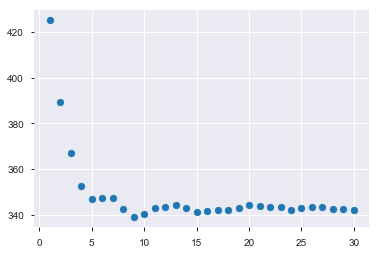

In [25]:

rmse_values = list()
hyp_rmse = dict()
hyper_params = [x for x in range(1,31)]

for k in hyper_params:
    knn=KNeighborsRegressor(n_neighbors=k, algorithm='brute')
    knn.fit(X_train, y_train)
    predictions=knn.predict(X_test)
    mse=mean_squared_error(y_test, predictions)
    rmse=np.sqrt(np.absolute(mse))
    rmse_values.append(rmse)
min_rmse=rmse_values[0]
for index, rmse in enumerate(rmse_values): 
    if min_rmse>rmse:
        min_rmse=rmse
        key=index+1
rmse=min_rmse
hyp_rmse[key]=rmse
print(hyp_rmse)

%matplotlib inline
plt.scatter(hyper_params,rmse_values)
plt.show()

## K fold cross validation

In [26]:
from sklearn.model_selection import cross_val_score, KFold
def cross_validate(model):
    kf=KFold(10, shuffle=True, random_state=1)
    mses=cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    rmses=np.sqrt(np.absolute(mses))
    avg_rmse=np.mean(rmses)
    return avg_rmse



Best k value and corresponding rmse for the k nearest neighbour is:  {23: 321.55086389907103}


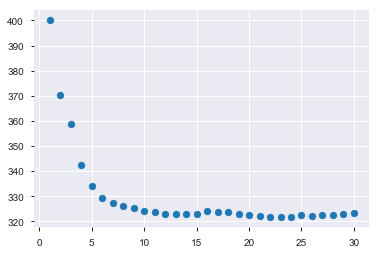

In [27]:

def hyperparamoptimizer():
    rmse_values = list()
    hyp_rmse = dict()
    hyper_params = [x for x in range(1,31)]
    for k in hyper_params:
        model=KNeighborsRegressor(n_neighbors=k, algorithm='brute')
        rmse=cross_validate(model)
        rmse_values.append(rmse)
    min_rmse=rmse_values[0]
    for index, rmse in enumerate(rmse_values): 
        if min_rmse>rmse:
            min_rmse=rmse
            key=index+1
    rmse=min_rmse
    hyp_rmse[key]=rmse
    print('Best k value and corresponding rmse for the k nearest neighbour is: ',hyp_rmse)
    %matplotlib inline
    plt.scatter(hyper_params,rmse_values)
    plt.show()
    return key,rmse
k,avg_rmse=hyperparamoptimizer()

In [28]:
avg_rmse

321.55086389907103

In [29]:

accuracy.append(avg_rmse)
accuracy

[353.0668738105901, 321.55086389907103]

Here, we have observed **nearly 5%** boost in rmse when we compare rmse values observed when we identified the hyperparameter using static train/test set and with kfold cross validation.

## Model 3-Decision Tree

In [30]:


from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(min_samples_leaf=5)
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(min_samples_leaf=5)



## Train/Test the DecisionTreeRegressor Model

In [31]:


model.fit(X_train,y_train)
test_pred1=model.predict(X_test)
train_pred1=model.predict(X_train)




## Calculate Error metric for DecisionTreeRegressor model

In [32]:


print(test_pred1.shape)
print(train_pred1.shape)
print(y_test.shape)
print(y_train.shape)
print(type(test_pred1))
print(type(train_pred1))
print(type(y_test))
print(type(y_train))

(1939,)
(5814,)
(1939, 1)
(5814, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [33]:
test_pred1=test_pred1.reshape((1939,1))
train_pred1=train_pred1.reshape((5814,1))

test_rmse=np.sqrt(np.absolute(np.mean((test_pred1 - y_test) ** 2)))

print(test_rmse)




price    335.719858
dtype: float64



## kfold cross validation-Decision Tree

In [34]:
avg_rmse=cross_validate(model)
accuracy.append(avg_rmse)
accuracy

[353.0668738105901, 321.55086389907103, 305.36090878136991]


## Model 4-Random Forest Model


In [35]:


model=RandomForestRegressor(min_samples_leaf=5)


## Train/Test the RandomForestRegressor Model


In [36]:

model.fit(X_train,y_train)
test_pred2=model.predict(X_test)
train_pred2=model.predict(X_train)



print(test_pred2.shape)
print(train_pred2.shape)
print(y_test.shape)
print(y_train.shape)
print(type(test_pred2))
print(type(train_pred2))
print(type(y_test))
print(type(y_train))
test_pred2=test_pred2.reshape((1939,1))
train_pred2=train_pred2.reshape((5814,1))




(1939,)
(5814,)
(1939, 1)
(5814, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


/Applications/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


## Calculate Error metric for RandomForestRegressor model


In [37]:


test_rmse=np.sqrt(np.absolute(np.mean((test_pred2 - y_test) ** 2)))
train_rmse=np.sqrt(np.absolute(np.mean((train_pred2 - y_train) ** 2)))
print(test_rmse)
print(train_rmse)

#accuracy.append(test_mse)
#accuracy.append(train_mse)





price    304.704341
dtype: float64
price    250.680127
dtype: float64


## kfold cross validation-Random Forest

In [38]:
avg_rmse=cross_validate(model)
accuracy.append(avg_rmse)
accuracy

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataCon

[353.0668738105901, 321.55086389907103, 305.36090878136991, 286.75775093286029]

In [39]:
Regressors=['Linear Regression','knn',  'Decision Tree','Random Forest']
accuracy_1_df=pd.DataFrame(accuracy,index=Regressors)   
accuracy_1_df.columns=['Model Performace']    
accuracy_1_df

,Model Performace
Linear Regression,353.066874
knn,321.550864
Decision Tree,305.360909
Random Forest,286.757751


# Observations

So far, we observed significant improvement in rmse by following steps:
- Changed Train/Test strategy from 80-20 to using the complete dataset using kfold Cross validation. But this comes at a significant computation cost. We are essentially repeating the initial train/test process 10 times for each model. The trade off between the accuracy and computational cost is generally driven by the business need. 
- Random Forest performs better in the 3 algorithms we have used. Basically, Random Forest is capable of dealing with overfitting problem because it's observations are essentially average of 10 Decision Trees.

Let's now analyse what can be done further to improve the predictions we are making. We have not yet looked at Outliers in the data. Let's remove the outliers from our dataset and run same set of models to make our predictions.

## Outlier Analysis

In [40]:
dc_listings.shape

(7753, 8)

In [41]:
from scipy import stats
import numpy as np
dc_listings=dc_listings[(np.abs(stats.zscore(dc_listings)) < 3).all(axis=1)]

In [42]:
dc_listings.shape

(7046, 8)

In above lines, we have removed 707 rows containing the outliers which were more than 3 standard deviation away from the mean.

## Data Normalization

In [43]:
normalized_listings=(dc_listings-dc_listings.mean())/dc_listings.std()
normalized_listings['price']=dc_listings['price']
normalized_listings.head()

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
0,-0.176788,-1.645790,-0.509983,-0.718041,95.0,-0.128706,-0.013312,0.521333
1,-0.748188,-1.645790,-0.509983,-0.718041,200.0,-0.635900,-0.015156,-0.552700
3,-0.176788,-0.319293,-0.509983,0.363703,129.0,-0.128706,-0.013312,2.510285
4,0.394611,1.007204,2.677485,2.527190,500.0,-0.128706,-0.015150,-0.592480
5,-0.748188,-0.319293,2.677485,-0.718041,110.0,1.900070,-0.013979,-0.353805


In [44]:
#Dividing data into features and labels

X=normalized_listings.iloc[:,normalized_listings.columns!='price']
y=normalized_listings.iloc[:,normalized_listings.columns=='price']
X.head()

,accommodates,bedrooms,bathrooms,beds,minimum_nights,maximum_nights,number_of_reviews
0,-0.176788,-1.645790,-0.509983,-0.718041,-0.128706,-0.013312,0.521333
1,-0.748188,-1.645790,-0.509983,-0.718041,-0.635900,-0.015156,-0.552700
3,-0.176788,-0.319293,-0.509983,0.363703,-0.128706,-0.013312,2.510285
4,0.394611,1.007204,2.677485,2.527190,-0.128706,-0.015150,-0.592480
5,-0.748188,-0.319293,2.677485,-0.718041,1.900070,-0.013979,-0.353805


In [45]:
y.head()

,price
0,95.0
1,200.0
3,129.0
4,500.0
5,110.0


Now, we will directly jump into the kfold cross validation as it gives us better rmse.

## Model 1-Linear Regression

In [ ]:
accuracy1=[]
model=LinearRegression()
avg_rmse=cross_validate(model)
accuracy1.append(avg_rmse)
accuracy1

[186.10100870927241]

## Model 2-KNeighborsRegressor

In [ ]:
k,avg_rmse=hyperparamoptimizer()

accuracy1.append(avg_rmse)
accuracy1


## Model 3-DecisionTreeRegressor

In [ ]:
model=DecisionTreeRegressor(min_samples_leaf=5)
avg_rmse=cross_validate(model)
accuracy1.append(avg_rmse)
accuracy1

## Model 4-RandomForestRegressor

In [ ]:
model=RandomForestRegressor(min_samples_leaf=5)
avg_rmse=cross_validate(model)
accuracy1.append(avg_rmse)
accuracy1

In [ ]:
accuracy_2_df=pd.DataFrame(accuracy1,index=Regressors)   
accuracy_2_df.columns=['Model Performace']    
accuracy_2_df

# Conclusion

The rmse value for our first Predictive Model(Linear Regression) was twice as high as the last iteration of our predictive model(Random Forest).

If we summarize the incremental gain we observed over multiple iterations of our predictive models, following procedures helped us acheive better accuracy:
- Data Preprocessing
- HyperParameter optimization
- kFold cross validation
- Outlier Analysis
